Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None

Summary statistics for numerical columns:
        loan_amount      repaid       loan_id        rate
count    443.000000  443.000000    443.000000  443.000000
mean    7982.311512    0.534989  11017.101580    3.217156
std     4172.891992    0.499338    581.826222    2.397168
min      559.000000    0.000000  10009.000000    0.010000
25%     4232.500000    0.000000  10507.500000    1.220000
50%     8320.000

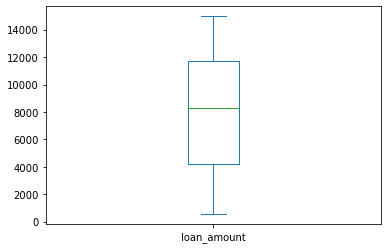

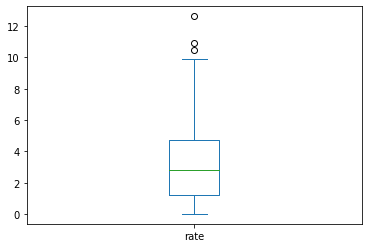

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
SQRT_RATE      0
sqrt_rate      0
dtype: int64

Medians for Y Train and Y Test variables:
The median for Y Train variables is: 8360.5
The median for Y Test variables is: 7813.0


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('dataset_for_ml.csv', index_col='client_id')


print("Basic information about the dataset:")
print(df.info())

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nFirst few rows of the dataset:")
print(df.head())

# Convert data types
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')
df['loan_start'] = pd.to_datetime(df['loan_start'], format='%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format='%Y-%m-%d')

# Summary Statistics for Numerical data:
df.describe()

# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

# use isnull().sum() to check for missing values 
df.isnull().sum() 

# For loan_amount 
df['loan_amount'].plot(kind='box')
plt.show()

# For rate 
df['rate'].plot(kind='box')
plt.show()

df['SQRT_RATE'] = df['rate']**0.5

df['sqrt_rate'] = np.sqrt(df['rate'])

df.head()



# Checking missing values
print(df.isnull().sum())

# Handling Outliers using Z-score
avg_rate = df['rate'].mean()
std_rate = df['rate'].std()
df['Z_Score_Rate'] = (df['rate'] - avg_rate) / std_rate
df_cleaned_zscore = df[(df['Z_Score_Rate'] > -3) & (df['Z_Score_Rate'] < 3)].copy()

# Handling Outliers using IQR
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)
df_cleaned_iqr = df[(df['rate'] > LC) & (df['rate'] < UC)].copy()

# Scaling using Z-score
scaler = StandardScaler()
df_scaled = df[['loan_amount', 'rate']]
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

# Scaling using Min-Max
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[['loan_amount', 'rate']]), columns=['loan_amount', 'rate'])



# Label Encoding
label_encoder = LabelEncoder()
df['loan_type_encoded'] = label_encoder.fit_transform(df['loan_type'])

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df[['repaid', 'loan_start', 'loan_end', 'loan_type_encoded']], df['loan_amount'], train_size=0.8, random_state=0)

# Median calculation
median_y_train = Y_train.median()
median_y_test = Y_test.median()

print("\nMedians for Y Train and Y Test variables:")
print('The median for Y Train variables is:', median_y_train)
print('The median for Y Test variables is:', median_y_test)

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


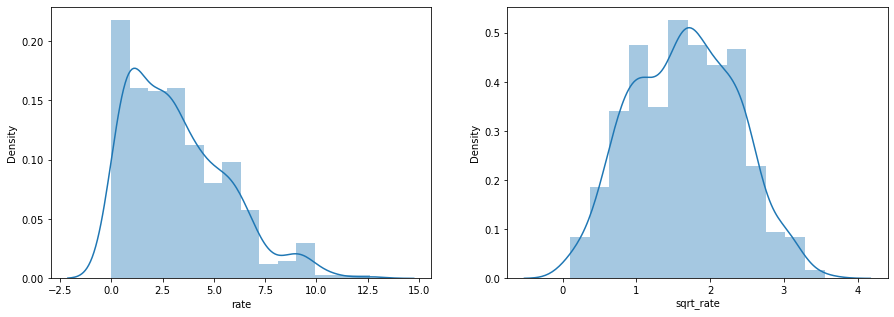

In [6]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()